<a href="https://colab.research.google.com/github/sxsmg/ai-notebooks/blob/main/Pneumonia_xray_with_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets
!pip install pandas
!pip install -Uqq fastbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 719 kB 4.8 MB/s 
     |████████████████████████████████| 365 kB 55.6 MB/s 
     |████████████████████████████████| 1.3 MB 67.2 MB/s 
     |████████████████████████████████| 4.7 MB 47.9 MB/s 
     |████████████████████████████████| 212 kB 73.0 MB/s 
     |████████████████████████████████| 141 kB 61.2 MB/s 
     |████████████████████████████████| 101 kB 14.2 MB/s 
     |████████████████████████████████| 115 kB 71.8 MB/s 
     |████████████████████████████████| 596 kB 71.7 MB/s 
     |████████████████████████████████| 127 kB 69.6 MB/s 
     |████████████████████████████████| 6.6 MB 55.1 MB/s 


In [3]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 509 kB 4.8 MB/s 


In [4]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dilation
Your Kaggle Key: ··········


100%|██████████| 2.29G/2.29G [00:13<00:00, 187MB/s]


In [5]:
import matplotlib.pyplot as plt
from fastbook import *
import timm

In [6]:
path = "./chest-xray-pneumonia/"

In [7]:


failed = verify_images(get_image_files(path + "/train/PNEUMONIA"))
failed.map(Path.unlink)
len(failed)

0

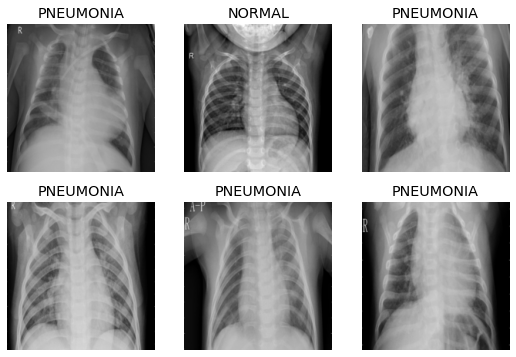

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.304842,0.170600,0.046968,03:56


epoch,train_loss,valid_loss,error_rate,time
0,0.101831,0.057725,0.014518,03:51
1,0.037885,0.024313,0.007259,03:52
2,0.008255,0.022617,0.005978,03:55
